# Model Tuning
## Learning Rate
The following leverages the learning rate scheduler callback functionality in tensorflow and plots the learning rate, and losses by epoch.

In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
print(tf.__version__)

2.4.1


## Data
Creating a circular classification problem.

In [2]:
# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [3]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set 

((800, 2), (200, 2))

## Model

In [4]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])

2022-07-21 12:56:32.440034: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-21 12:56:32.441890: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-21 12:56:32.449423: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-07-21 12:56:32.539161: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-07-21 12:56:32.549055: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2659995000 Hz


Epoch 1/100
25/25 [==============================] - 1s 19ms/step - loss: 0.6909 - accuracy: 0.5016
Epoch 2/100
25/25 [==============================] - 1s 23ms/step - loss: 0.6929 - accuracy: 0.5065
Epoch 3/100
25/25 [==============================] - 1s 25ms/step - loss: 0.6925 - accuracy: 0.5094
Epoch 4/100
25/25 [==============================] - 0s 13ms/step - loss: 0.6945 - accuracy: 0.4864
Epoch 5/100
25/25 [==============================] - 0s 10ms/step - loss: 0.6968 - accuracy: 0.4857
Epoch 6/100
25/25 [==============================] - 0s 11ms/step - loss: 0.6848 - accuracy: 0.5191
Epoch 7/100
25/25 [==============================] - 0s 19ms/step - loss: 0.6799 - accuracy: 0.5292
Epoch 8/100
25/25 [==============================] - 1s 22ms/step - loss: 0.6845 - accuracy: 0.5055
Epoch 9/100
25/25 [==============================] - 0s 11ms/step - loss: 0.6934 - accuracy: 0.4750
Epoch 10/100
25/25 [==============================] - 0s 14ms/step - loss: 0.6906 - accuracy: 0.4965

## Visualization

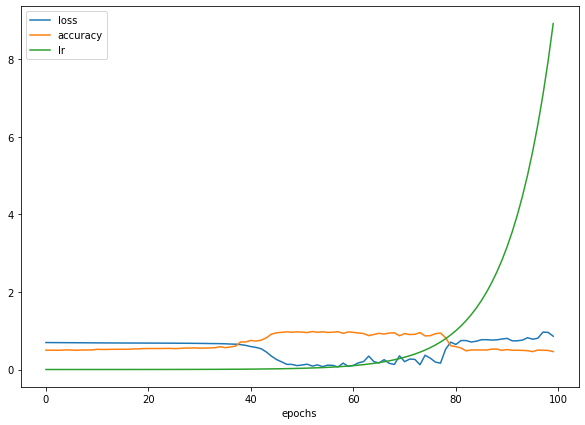

In [7]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

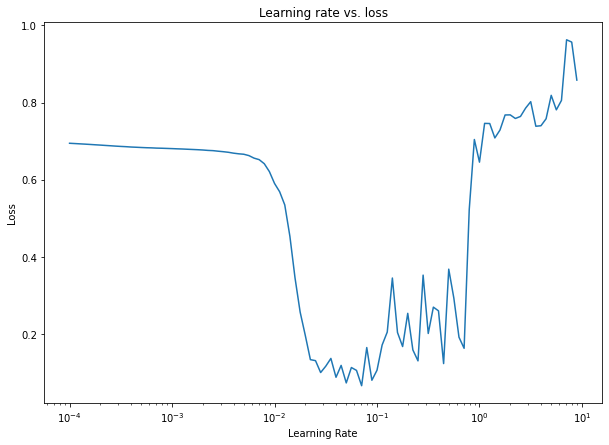

In [12]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

The lowest point seems to be about 0.02. Let's update the model.

In [13]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 16ms/step - loss: 0.6834 - accuracy: 0.5400
Epoch 2/20
25/25 [==============================] - 0s 15ms/step - loss: 0.6778 - accuracy: 0.5511
Epoch 3/20
25/25 [==============================] - 0s 17ms/step - loss: 0.6638 - accuracy: 0.5568
Epoch 4/20
25/25 [==============================] - 0s 14ms/step - loss: 0.6416 - accuracy: 0.6380
Epoch 5/20
25/25 [==============================] - 0s 14ms/step - loss: 0.5957 - accuracy: 0.7609
Epoch 6/20
25/25 [==============================] - 0s 11ms/step - loss: 0.5134 - accuracy: 0.8213
Epoch 7/20
25/25 [==============================] - 0s 8ms/step - loss: 0.4595 - accuracy: 0.8078
Epoch 8/20
25/25 [==============================] - 0s 16ms/step - loss: 0.3685 - accuracy: 0.8941
Epoch 9/20
25/25 [==============================] - 0s 12ms/step - loss: 0.3248 - accuracy: 0.9016
Epoch 10/20
25/25 [==============================] - 1s 18ms/step - loss: 0.2665 - accuracy: 0.9386
Epoch 11/2

In [14]:
# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 13ms/step - loss: 0.0574 - accuracy: 0.9900


[0.057401880621910095, 0.9900000095367432]

Boom!